<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/Optimization/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# KNN

In [10]:
import numpy as np
import pandas as pd
import timeit
from sklearn.model_selection import train_test_split
%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [11]:
data = pd.read_csv(r'/content/drive/MyDrive/ML/Data/density_contrast.csv')
data.head()

,particle_id,in-halo,den_contrast for 12.4,den_contrast for 13.0,den_contrast for 13.6
0,6872359,0,-0.047697,-0.043106,-0.038331
1,5818539,0,-0.034318,-0.036062,-0.034318
2,9365399,1,-0.036311,-0.041542,-0.037702
3,7002365,1,-0.022502,-0.032049,-0.035913
4,9348414,0,-0.050822,-0.046012,-0.039032


In [12]:
data = data.sort_values( by =['den_contrast for 12.4'])
X, Y = data.iloc[:,2:], data['in-halo']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 7500    X_test : 2500


In [13]:
X_test,X_train = np.array(X_test),np.array(X_train)
Y_test,Y_train = np.array(Y_test),np.array(Y_train)
X ,Y= np.array(X),np.array(Y)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                  algorithm='auto', leaf_size = 30, p = 2, metric='minkowski', metric_params = None)
#check
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
#check
%t Y_predict_knn = classifier.predict(X_test)

100 loops, best of 5: 3.88 ms per loop
10 loops, best of 5: 76.7 ms per loop


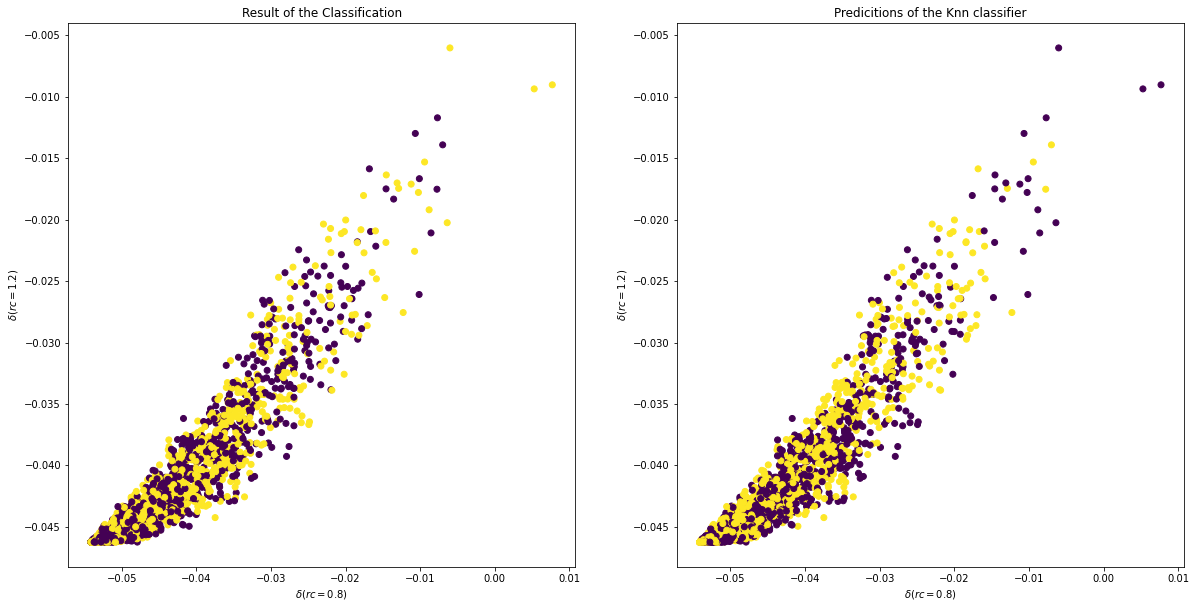

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_knn)
plt.show()


plt.show()

In [16]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1254
           1       0.50      0.52      0.51      1246

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500



Validation Curve

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


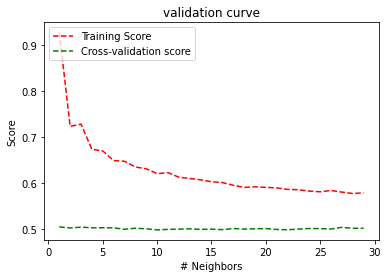

In [17]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1,30, 1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="n_neighbors", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('# Neighbors')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

Optimal value of $n_{neighbor}$ = 28

Run-Time vs. leaf-size


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


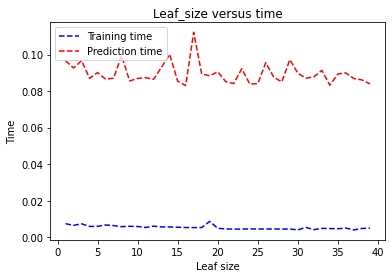

In [18]:
import time

leaf_range = np.arange(1,40,1)

t_time = np.array([])
p_time = np.array([])

for i in leaf_range:
    print(i)
    classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=i, p=2, metric='minkowski')
    
    start = time.time()
    classifier.fit(X_train, Y_train)
    stop = time.time()
    t1 = stop - start
    t_time = np.append(t_time , t1)
    
    start = time.time()
    n = classifier.predict(X_test)
    stop = time.time()
    t2 = stop - start
    p_time = np.append(p_time , t2)
    
plt.plot(leaf_range , t_time , 'b--' , label = 'Training time')
plt.plot(leaf_range , p_time , 'r--' , label = 'Prediction time')
plt.title('Leaf_size versus time')
plt.xlabel('Leaf size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.show()

Learning Curve

In [20]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,8000,500)

print('learning started')
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

learning started
Training scores:

            0         1         2         3         4
0   0.623000  0.550000  0.550000  0.550000  0.550000
1   0.616000  0.559333  0.559333  0.559333  0.559333
2   0.614500  0.575000  0.563000  0.563000  0.563000
3   0.604800  0.573200  0.570000  0.570000  0.570000
4   0.595333  0.567667  0.577667  0.577667  0.577667
5   0.594571  0.572286  0.580857  0.580857  0.580857
6   0.590750  0.572000  0.587750  0.586750  0.586750
7   0.587778  0.569778  0.583556  0.583111  0.583111
8   0.589200  0.573200  0.587400  0.581400  0.581400
9   0.588545  0.573818  0.584545  0.580182  0.580182
10  0.589500  0.575667  0.586333  0.578833  0.578667
11  0.590615  0.580000  0.588769  0.583385  0.578769
12  0.592429  0.581286  0.590286  0.585571  0.580000
13  0.598400  0.588000  0.596133  0.591733  0.579733

Validation scores:

         0       1       2       3       4
0   0.504  0.4965  0.4995  0.5000  0.5000
1   0.504  0.4835  0.5130  0.5010  0.5000
2   0.504  0.4995  0.

Fine Tuning The Model

In [24]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 2500 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

2500
7500
10000


In [25]:
classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=30 , p=2, metric='minkowski')
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
%t Y_predict_knn = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_knn[Y_predict_knn == 1]))

The slowest run took 5.56 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 1.38 ms per loop
1 loop, best of 5: 244 ms per loop
7500
3151


In [26]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.51      0.59      0.54      3773
           1       0.50      0.43      0.46      3727

    accuracy                           0.51      7500
   macro avg       0.51      0.51      0.50      7500
weighted avg       0.51      0.51      0.50      7500



Metrics

In [27]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_knn)
print('Here is the confusion matrix for the Knn classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')

Here is the confusion matrix for the Knn classifier: 

TP = 2208   FP = 1565 

FN = 2141   TN = 1586 



Confusion matrix, without normalization
[[2208 1565]
 [2141 1586]]
Normalized confusion matrix
[[0.58521071 0.41478929]
 [0.57445667 0.42554333]]


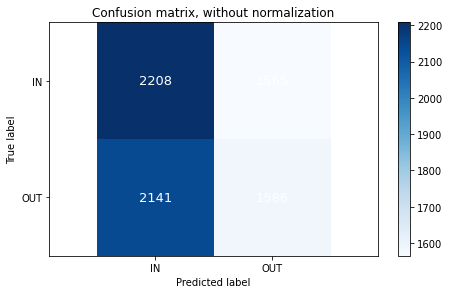

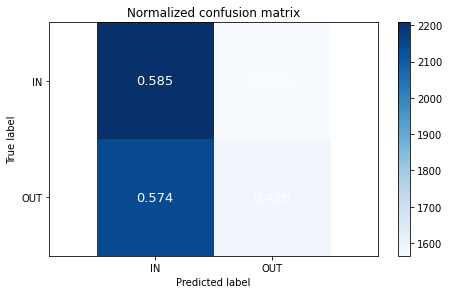

In [28]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Acurracy

In [29]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 50.587%


Recall

In [30]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_knn, pos_label=0)
precision = precision_score(Y_test, Y_predict_knn, pos_label = 0)
print(f"The recall for the Knn classifier: \n {round(recall,3)}"  )
print(f"The precision for Knn classifier: \n {round(precision,3)}"  )

The recall for the Knn classifier: 
 0.585
The precision for Knn classifier: 
 0.508


Precision - Recall curve

[[0.45 0.55]
 [0.4  0.6 ]
 [0.55 0.45]
 ...
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.45 0.55]]
[1 1 0 ... 0 0 1]


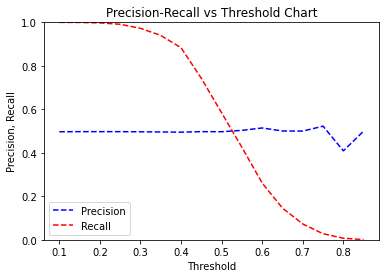

In [31]:
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_knn)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

Bias & Variance

In [32]:
%pip install mlxtend --upgrade

In [33]:
from mlxtend.evaluate import bias_variance_decomp

In [34]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(classifier ,X_train, Y_train, X_test, Y_test, loss='mse', num_rounds=200, random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.498
Average bias: 0.324
Average variance: 0.174
